### Imports

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from utils import *
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../physionet.org/files/widsdatathon2020/1.0.0/data/cleaned_imputed.csv")
list(df.columns)


['Unnamed: 0',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasiv

In [3]:
df_ = pd.read_csv('../physionet.org/files/widsdatathon2020/1.0.0/data/WiDS_Datathon_2020_Dictionary.csv')

BINARY_ATTS = df_[df_['Data Type'].str.lower() == 'binary']['Variable Name'].tolist()
print(f"Binary atts : {BINARY_ATTS}")
STRING_ATTS = df_[df_['Data Type'].str.lower() == 'string']['Variable Name'].tolist()
print(f"String atts : {STRING_ATTS}")
INT_ATTS = df_[df_['Data Type'].str.lower() == 'integer']['Variable Name'].tolist()
print(f"Integer atts : {INT_ATTS}")
FLOAT_ATTS = df_[df_['Data Type'].str.lower() == 'numeric']['Variable Name'].tolist()
FLOAT_ATTS.remove('pred')
print(f"Float atts : {FLOAT_ATTS}")


Binary atts : ['hospital_death', 'elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
String atts : ['bmi', 'ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_admit_type', 'icu_stay_type', 'icu_type', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_3j_bodysystem', 'apache_2_bodysystem']
Integer atts : ['encounter_id', 'hospital_id', 'patient_id', 'icu_id', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']
Float atts : ['age', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', '

### Outliers

In [4]:
iso_forest = IsolationForest(contamination=0.05, random_state=69)

# Combine the lists but only use those features that are in the DataFrame
features = [att for att in (INT_ATTS + FLOAT_ATTS) if att in df.columns]
missing_features = set(INT_ATTS + FLOAT_ATTS) - set(features)
if missing_features:
    print("These features are missing from the DataFrame:", missing_features)
    
# Initialize and fit the IsolationForest
# 'contamination' parameter sets the proportion of expected outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df[features])

# Predict: 1 for inliers, -1 for outliers
df['anomaly'] = iso_forest.predict(df[features])

# Keep only the inliers
df_clean = df[df['anomaly'] == 1].drop('anomaly', axis=1)

df = df.drop("anomaly", axis=1)
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_clean.shape)

These features are missing from the DataFrame: {'d1_mbp_invasive_min', 'h1_lactate_max', 'h1_diasbp_invasive_min', 'h1_arterial_pco2_min', 'h1_wbc_min', 'h1_hemaglobin_min', 'd1_arterial_ph_min', 'h1_inr_min', 'h1_creatinine_max', 'd1_diasbp_invasive_max', 'h1_sodium_min', 'h1_pao2fio2ratio_min', 'd1_arterial_po2_min', 'h1_bilirubin_max', 'h1_hco3_max', 'd1_lactate_max', 'albumin_apache', 'h1_hematocrit_max', 'icu_id', 'h1_sodium_max', 'encounter_id', 'h1_wbc_max', 'h1_arterial_ph_max', 'd1_bilirubin_min', 'h1_albumin_min', 'h1_sysbp_invasive_max', 'h1_calcium_max', 'h1_potassium_max', 'paco2_for_ph_apache', 'd1_lactate_min', 'h1_sysbp_invasive_min', 'h1_arterial_po2_max', 'h1_potassium_min', 'h1_calcium_min', 'h1_hematocrit_min', 'd1_diasbp_invasive_min', 'd1_mbp_invasive_max', 'h1_bun_min', 'patient_id', 'apache_4a_hospital_death_prob', 'd1_albumin_min', 'h1_mbp_invasive_min', 'd1_arterial_ph_max', 'd1_pao2fio2ratio_max', 'h1_platelets_max', 'd1_arterial_pco2_min', 'h1_arterial_po2_m

/Users/alexraudvee/Desktop/TU_e/year_3/Y3_Q3_Responsible_Data_Science/Fairness-First-ICU-ML/.venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Original shape: (91713, 106)
Shape after removing outliers: (87127, 106)


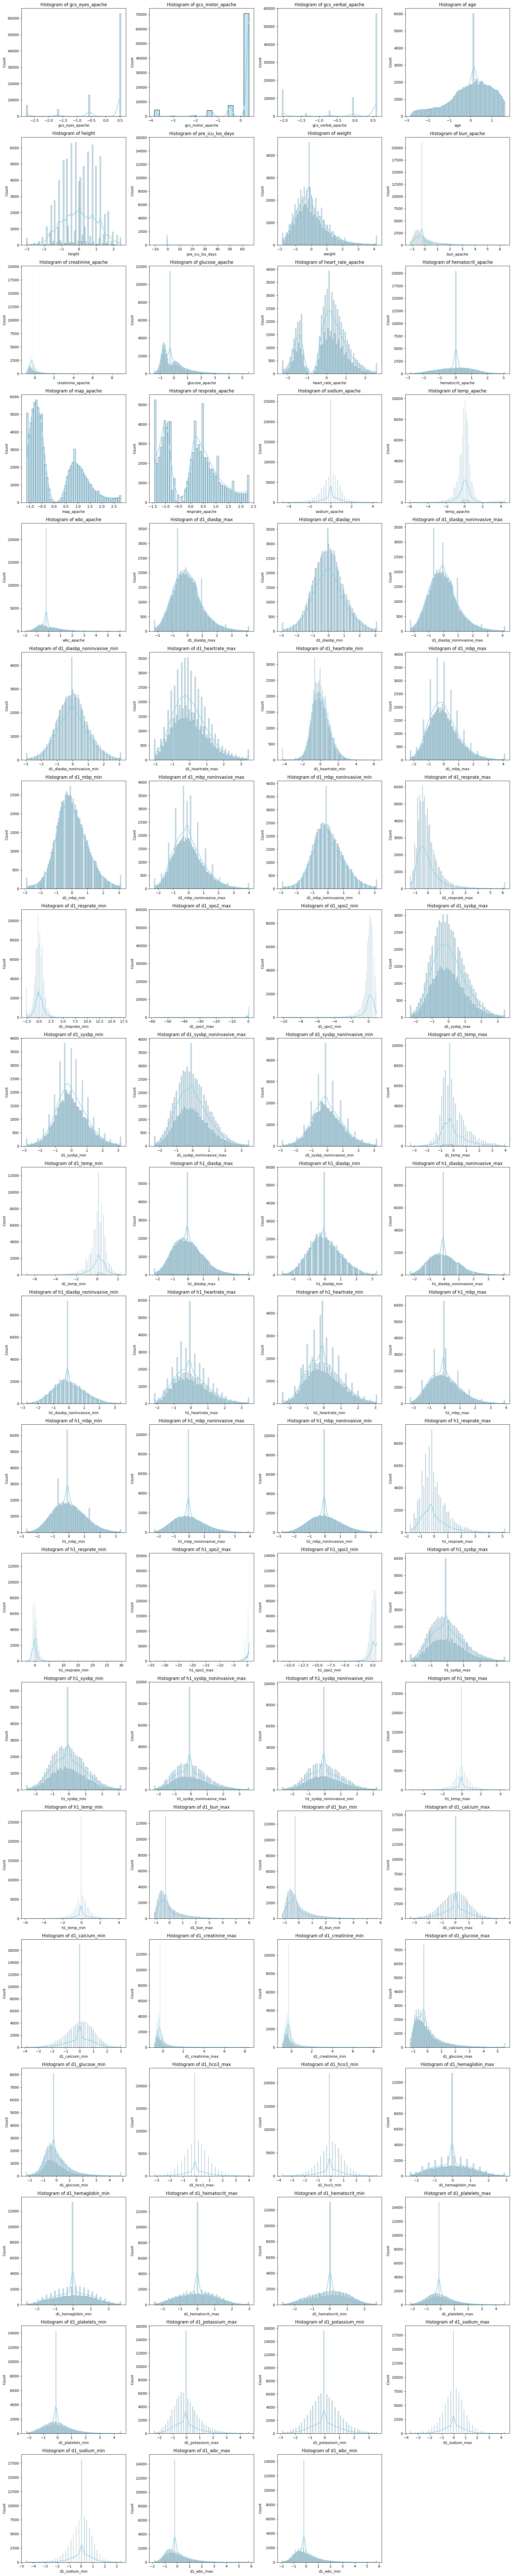

In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numeric features and transform them
df_clean[features] = scaler.fit_transform(df_clean[features])

# Set up the grid for subplots
num_cols = len(features)
cols = 4  
rows = (num_cols + cols - 1) // cols 

plt.figure(figsize=(20, rows * 5))  
for i, column in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    # Plot histogram with optional KDE overlay
    sns.histplot(df_clean[column], color='skyblue', kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()



In [6]:
df_clean.shape

(87127, 106)